In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('project_files/real_estate_data.csv')

In [4]:
# Drop duplicates
df.drop_duplicates()
df.shape

(1883, 26)

In [5]:
# Display unique values of 'basement'
df.basement.unique()

array([ nan,   1.])

In [8]:
# Missing basement values should be 0
df['basement']=df.basement.fillna(0)

In [9]:
# Display unique values of 'basement'
df.basement.unique()

array([ 0.,  1.])

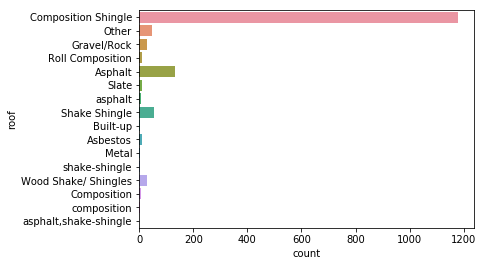

In [10]:
# Class distributions for 'roof'
sns.countplot(y='roof',data=df)

In [11]:
# 'composition' should be 'Composition'
df.roof.replace('composition','Composition',inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt','Asphalt',inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle',inplace=True)

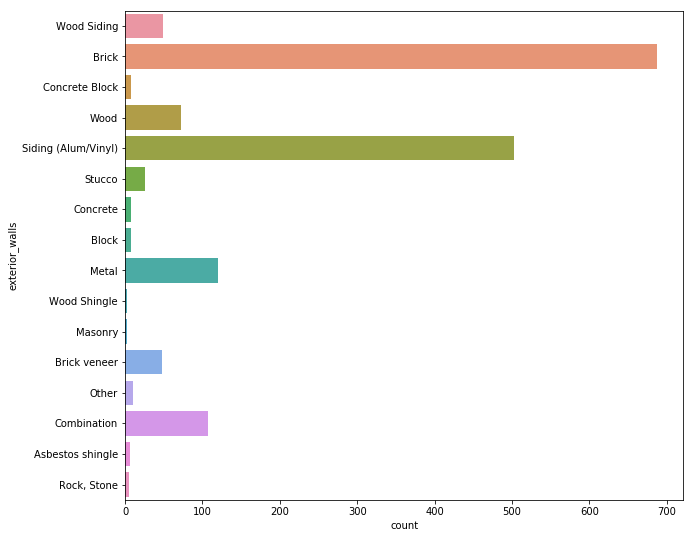

In [12]:
# Class distributions for 'exterior_walls'
plt.figure(figsize=(10,9))
sns.countplot(y='exterior_walls',data=df)
plt.show()

In [17]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone','Masonry',inplace=True)

In [15]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete','Block'],'Concrete Block',inplace=True)

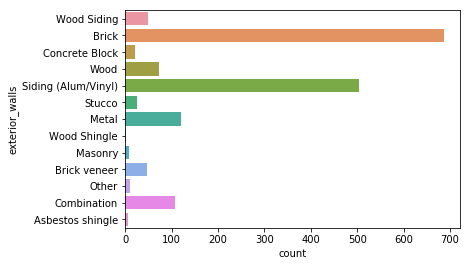

In [18]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls',data=df)
plt.show()

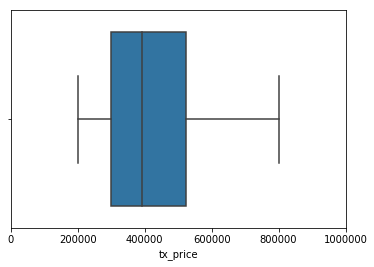

In [21]:
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(x='tx_price',data=df)
plt.xlim(0,1000000)
plt.show()

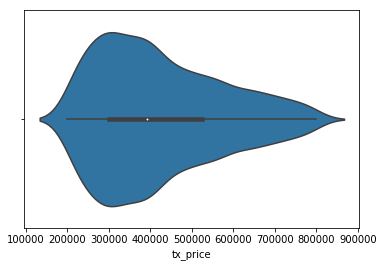

In [22]:
# Violin plot of 'tx_price' using the Seaborn library
sns.violinplot(df.tx_price)
plt.show()

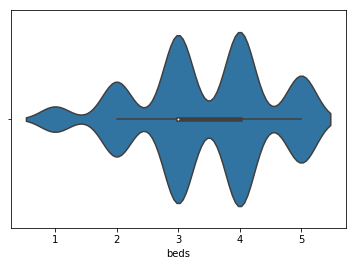

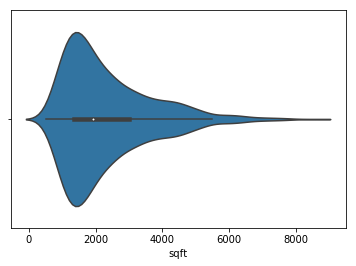

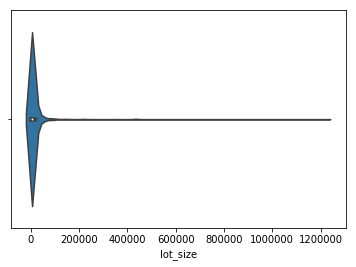

In [24]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()
# Violin plot of lot_size

sns.violinplot(df.lot_size)
plt.show()

In [27]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [30]:
# Remove lot_size outliers
df=df[df['lot_size']<500000]

# print length of df
len(df)

1882

In [34]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [38]:
# Fill missing categorical values

for column in df.select_dtypes(include=['object']):
    df['{}'.format(column)]=df['{}'.format(column)].fillna('Missing')

**Now, display the number of missing values for each categorical feature.**

In [39]:
# Display number of missing values by feature (categorical)

df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

In [41]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [42]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)